Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

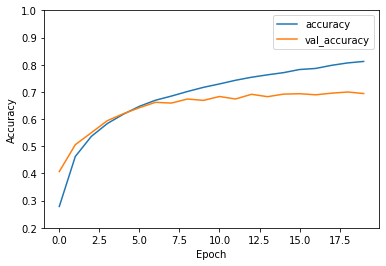

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#%load_ext_tensorboard 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import datetime
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#create model
model = models.Sequential()

#create 32 (3 x 3) Convolution layer 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#create 32 (3 x 3) Convolution layer 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#create 64 (3 x 3) Convolution layer 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#flatten to one dimensional
model.add(layers.Flatten())

#apply dense layer with size 64
model.add(layers.Dense(64, activation='relu'))
#apply final dense layer with size 10 for 10 classes
model.add(layers.Dense(10))

print(model.summary())
#compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.014,momentum=0.6)
model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

#run the model
history = model.fit(x_train, y_train, epochs=20 ,batch_size=50,validation_data=(x_test, y_test))

#testing accuracies
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print(test_acc)

#plot the Accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='upper right')
 



  